# SUPER STORE DATA ANALYSIS

# Objective : To Analyze retail sales data and to derive insights into customer behaviour, popular products and sales trends.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import cm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print("Libraries imported successfully")

Libraries imported successfully


# Loading the Dataset

In [3]:
df = pd.read_csv("SampleSuperstore.csv")
print("Dataset read successfully")

Dataset read successfully


# Data Exploration and Data Cleaning

In [4]:
#Number of rows and columns
df.shape

(9994, 13)

In [5]:
#Top 5 rows and columns
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
#Bottom 5 rows and columns
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
#Check the columns in the dataset
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
#Check the types of category in the dataset
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [9]:
#Check the types of sub-category in the dataset
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [10]:
#Check the types of segment in the dataset
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
#Description
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
#Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [13]:
#Drop the columns
df.drop(columns = ['Country', 'Postal Code'], axis =1, inplace = True)

In [14]:
#check whether the column is drop or not
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [15]:
#Check the null values
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [16]:
#Check the duplicates
df.duplicated().sum()

50

In [17]:
#Drop the duplicates
df.drop_duplicates(inplace = True)

In [18]:
df.duplicated().sum()

0

In [19]:
#Total Sales
print("Total Sales : ", format (df['Sales'].sum()))

#Total Profit
print("Total Profit : ", format (df['Profit'].sum()))

Total Sales :  2294599.3773
Total Profit :  286097.5579


# Data Visualization

In [20]:
cat = df['Category'].value_counts()
cat

Category
Office Supplies    5986
Furniture          2114
Technology         1844
Name: count, dtype: int64

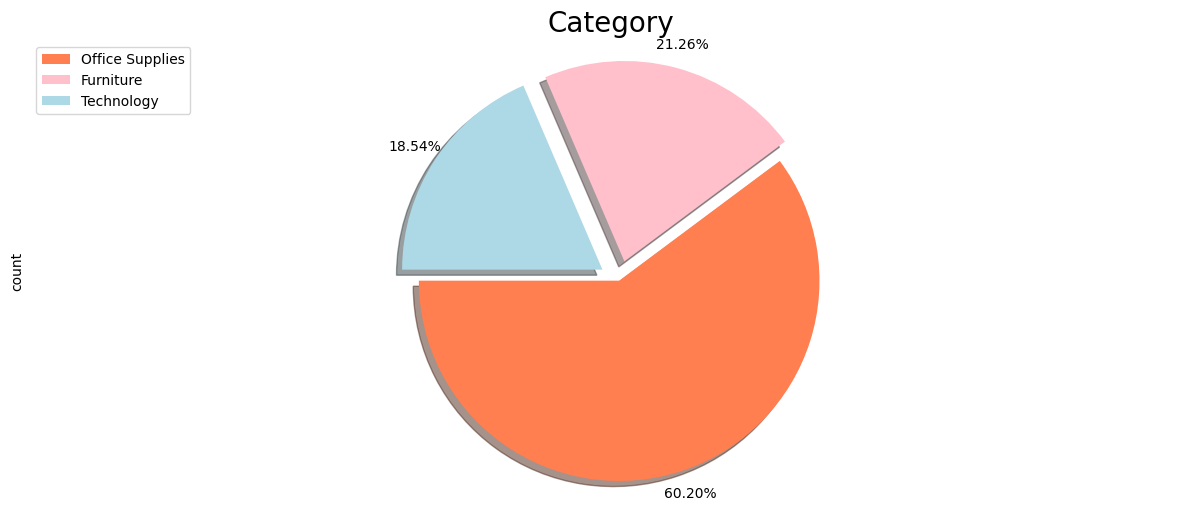

In [21]:
explode_list = [0,0.1,0.1]
colors_list = ["coral" , "pink", "lightblue"]
cat.plot(kind="pie", figsize = (15,6),autopct = "%1.2f%%",shadow=True, startangle = 180,
                                      explode = explode_list, labels=None, pctdistance = 1.12, colors = colors_list )
plt.title("Category", fontsize = 20)
plt.axis ("equal")
plt.legend(labels=cat.index, loc= "upper left")
plt.show()

NOTE : The above pie chart we can see that the major distribution of business in Category is Office Supplies and least distribution of business in Category is Technology


In [22]:
gb_cat = df.groupby (["Category"])[["Sales", "Profit"]].sum()
gb_cat

,Sales,Profit
Category,,
Furniture,740568.6663,18484.9459
Office Supplies,718256.0700,122196.0726
Technology,835774.6410,145416.5394


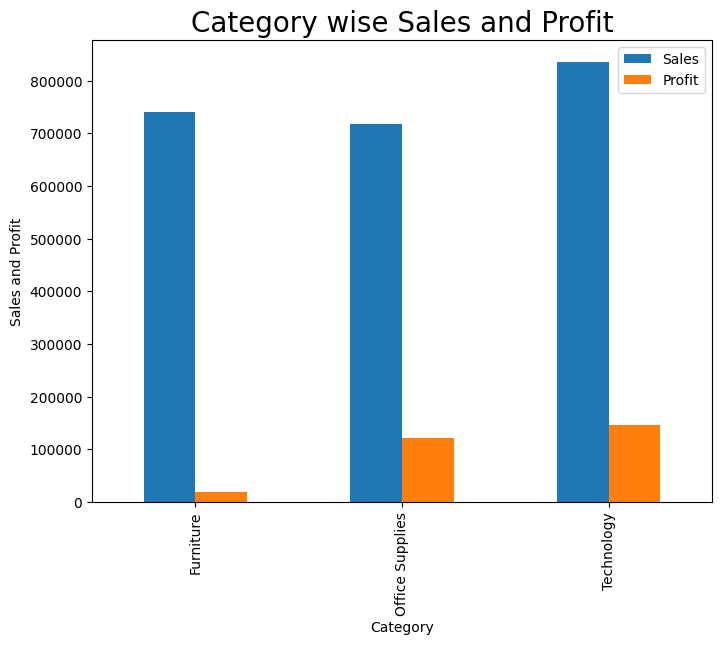

In [23]:
gb_cat.plot(kind = 'bar', figsize = (8,6))
plt.xlabel('Category')
plt.ylabel('Sales and Profit')
plt.title('Category wise Sales and Profit', fontsize = 20)
plt.show()

NOTE: The above chart we can concluded that the maximum Sales and Profit in Category is Technology and the minimum Sales and Profit in Category is            Office Supplies and Furniture

In [24]:
sub = df['Sub-Category'].value_counts()
sub

Sub-Category
Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

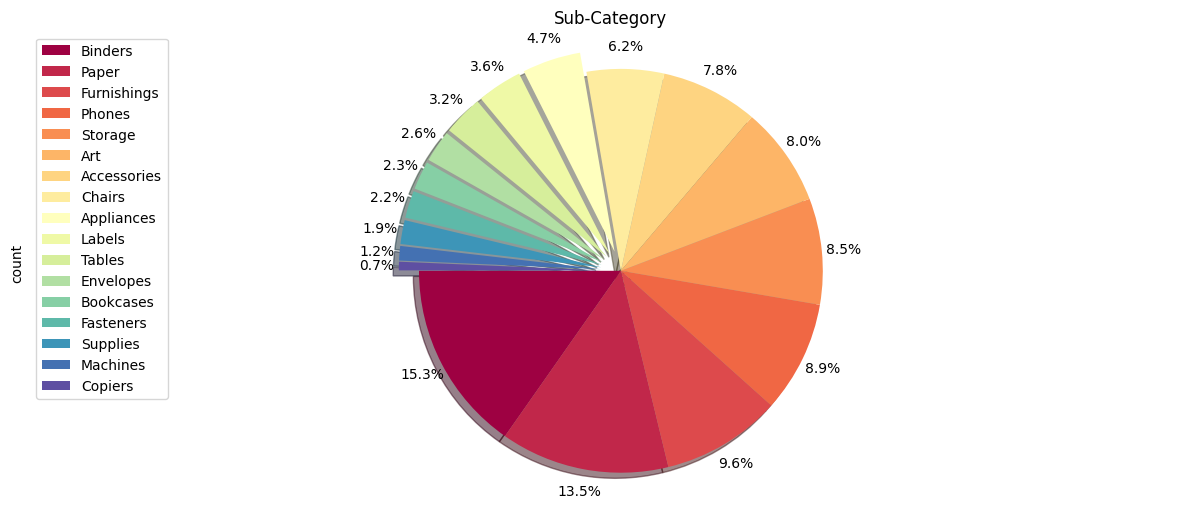

In [25]:
cmap = cm.get_cmap('Spectral')
explode_list = [0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
sub.plot(kind ="pie", figsize=(15,6), autopct= "%1.1f%%", shadow= True, startangle= 180,
                                      explode = explode_list, labels= None, pctdistance= 1.11, cmap = cmap)
plt.title("Sub-Category")
plt.axis("equal")
plt.legend(labels =sub.index, loc ="upper left")
plt.show()

NOTE: The major distribution of business in Sub-Category is Binders, Paper and Furnishings and the minor distribution of business in Sub-Category is          Copiers, Machines and Suppplies

In [28]:
gb_sub = df.groupby (["Sub-Category"])[["Sales", "Profit"]].sum()
gb_sub

,Sales,Profit
Sub-Category,,
Accessories,167303.3020,41920.9052
Appliances,107532.1610,18138.0054
Art,27065.7320,6511.8388
Binders,203328.8590,30205.2603
Bookcases,114166.9293,-3398.7542
Chairs,327777.7610,26567.1278
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


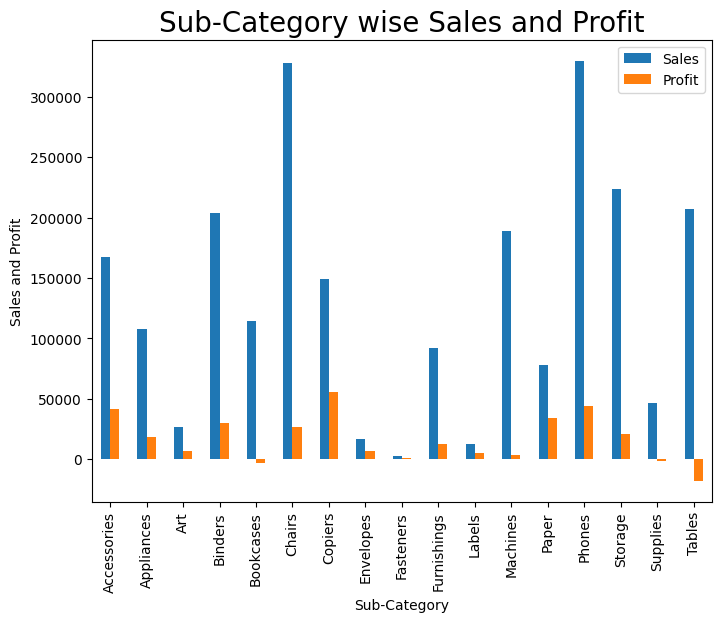

In [32]:
gb_sub.plot(kind = 'bar', figsize = (8,6))
plt.xlabel('Sub-Category')
plt.ylabel('Sales and Profit')
plt.title('Sub-Category wise Sales and Profit', fontsize = 20)
plt.show()

NOTE: The maximum Sales in Chairs and Phones and maximum Profit in Copiers, Accessories and Phones and the minimum Sales and Profit in Fasteners and          there is loss in tables and bookcases.

In [33]:
state= df['State'].value_counts()
state

State
California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

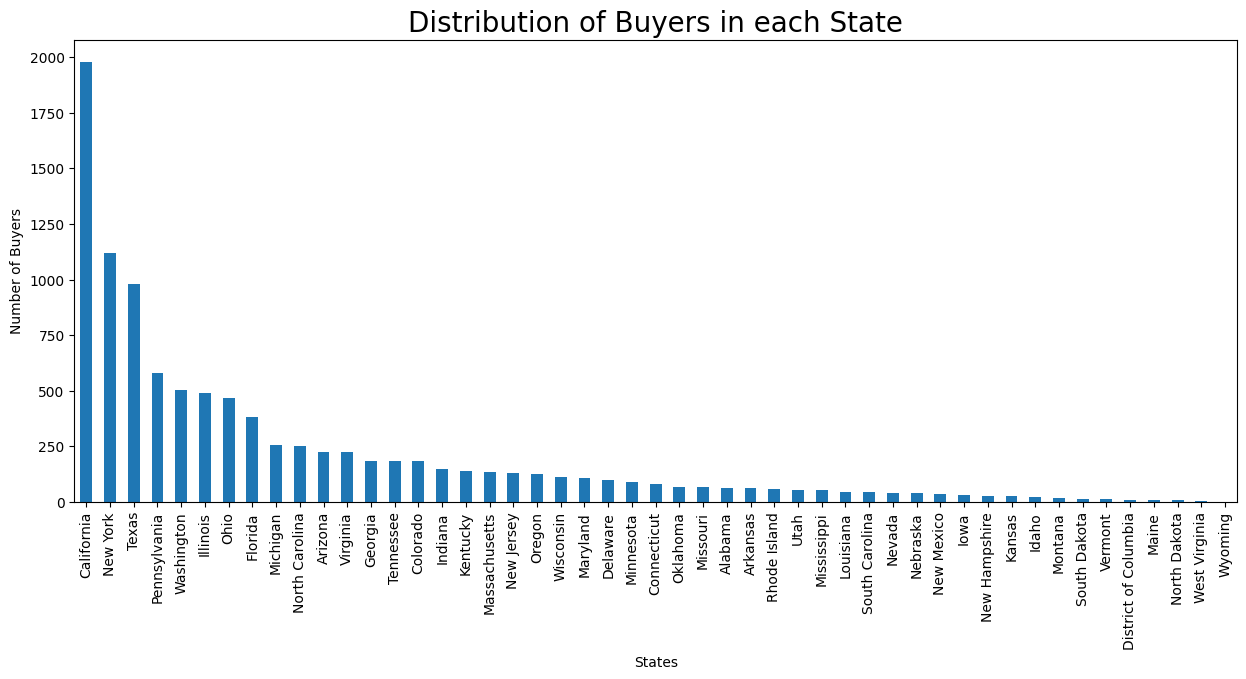

In [35]:
state.plot(kind = 'bar', figsize = (15,6))
plt.xlabel('States')
plt.ylabel('Number of Buyers')
plt.title('Distribution of Buyers in each State', fontsize = 20)
plt.show()

NOTE: The most number of buyers belong to California, New York and Texas and the least number of buyers belong to Wyoming, West Virginia and 
       North Dakota

In [37]:
s1 = df.groupby(["State"])["Sales"].sum().sort_values( ascending = False)
s2 = df.groupby(["State"])["Profit"].sum().sort_values(ascending = False)

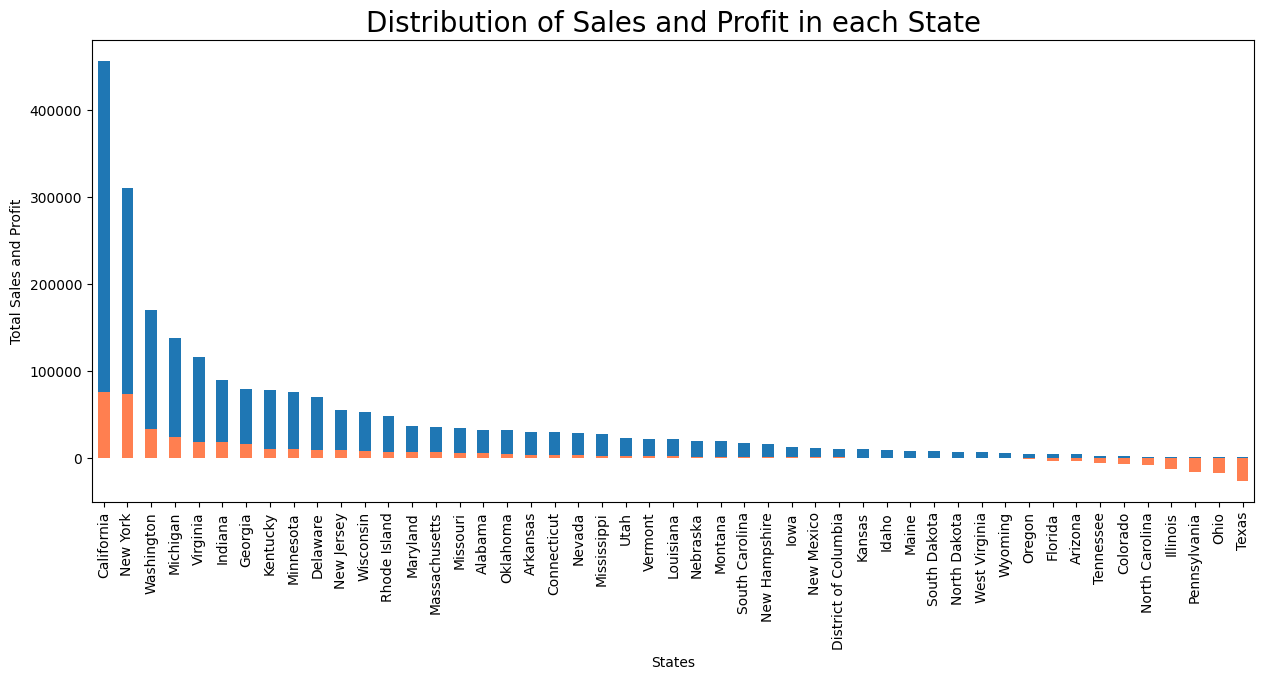

In [40]:
#State wise Distribution of Sales
s1.plot(kind ="bar", figsize =(15,6))

#State wise Distribution of Profit
s2.plot(kind ="bar", figsize =(15,6), color ="coral")
plt.xlabel("States")
plt.ylabel("Total Sales and Profit")
plt.title("Distribution of Sales and Profit in each State", fontsize = 20)
plt.show()

NOTE: The maximum Sales and Profit in state is California and New York and the minimum Sales in state is Texas, Ohio and Pennsylvania and minimum             Profit in state is District of Columbia and the maximum Loss in state is Texas, Ohio and Pennsylvania

In [41]:
reg = df["Region"].value_counts()
reg

Region
West       3177
East       2832
Central    2315
South      1620
Name: count, dtype: int64

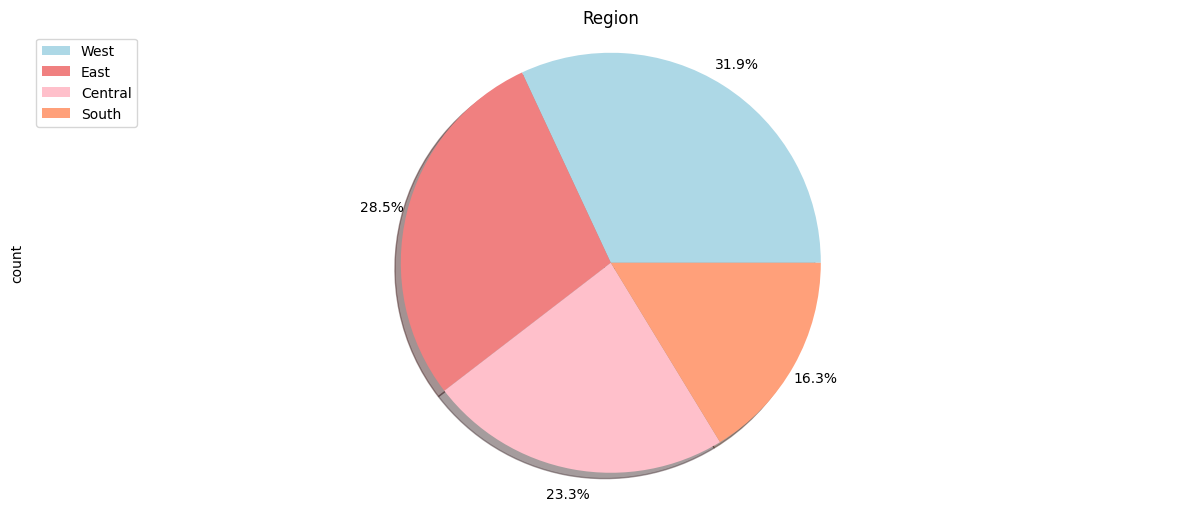

In [45]:
colors_list = ["lightblue", "lightcoral", "pink", "lightsalmon"]
reg.plot(kind="pie", figsize = (15,6),autopct = "%1.1f%%",shadow=True, 
                                      labels=None, pctdistance = 1.12, colors = colors_list )
plt.title("Region")
plt.axis("equal")
plt.legend(labels =reg.index, loc ="upper left")
plt.show()

NOTE: Maximum number of buyers in Western Region and Least number of buyers in Southern Region

In [46]:
gb_region = df.groupby(["Region"])[["Sales", "Profit"]].sum().sort_values(by= ["Sales", "Profit"], ascending = False)
gb_region

,Sales,Profit
Region,,
West,724309.2935,108214.9893
East,677843.9080,91471.0909
Central,500724.2708,39662.0474
South,391721.9050,46749.4303


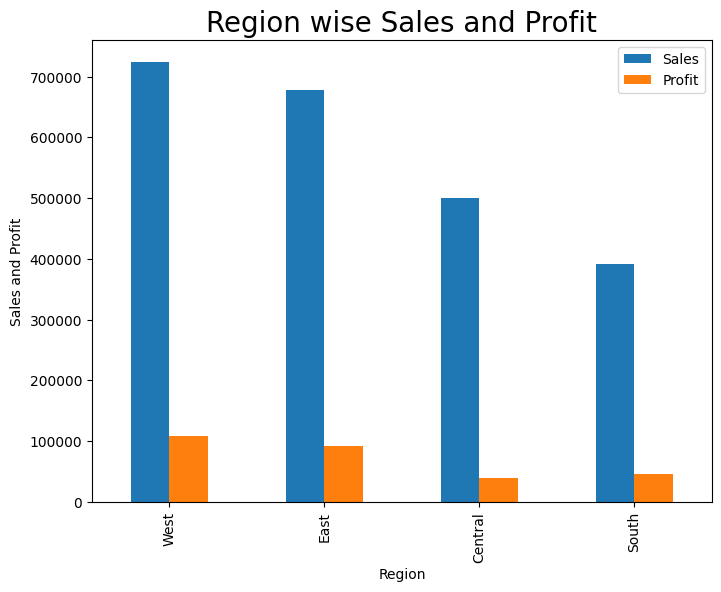

In [50]:
gb_region.plot(kind = 'bar', figsize = (8,6))
plt.xlabel('Region')
plt.ylabel('Sales and Profit')
plt.title('Region wise Sales and Profit', fontsize = 20)
plt.show()

NOTE: The maximum Sales and Profit in West region and the minimum Sales in South region and minimum Profit in Central region

In [53]:
sm = df["Ship Mode"].value_counts()
sm

Ship Mode
Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: count, dtype: int64

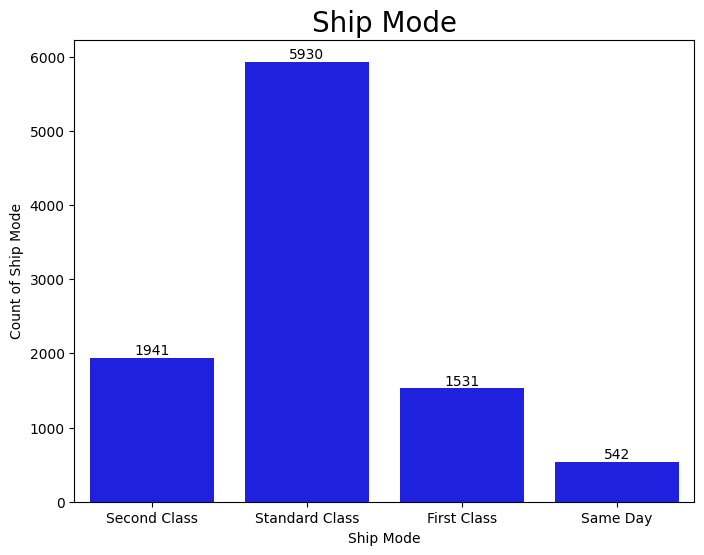

In [58]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x = "Ship Mode", data = df, color ="blue")
for bars in ax.containers:
    ax.bar_label(bars)
plt.ylabel("Count of Ship Mode")
plt.title("Ship Mode", fontsize =20)
plt.show()

NOTE: Most opted Ship Mode is Standard Class and Least opted Ship Mode is Same Day

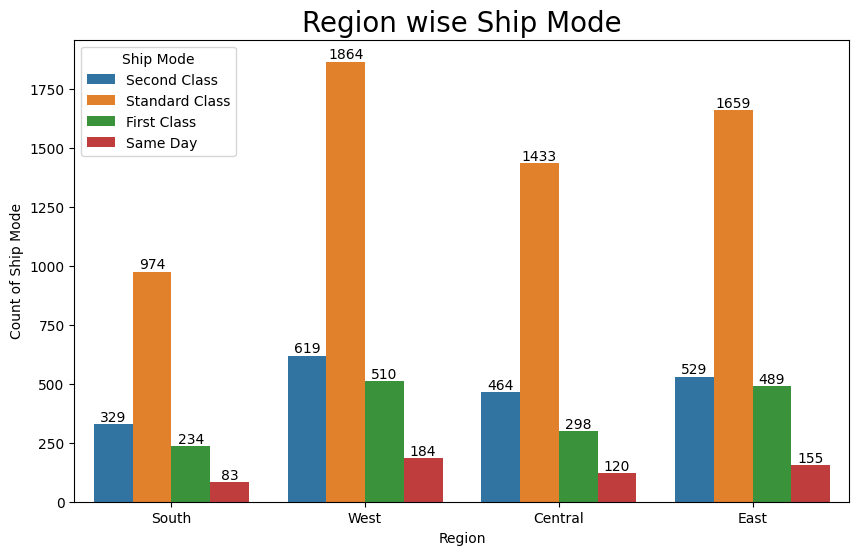

In [59]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = "Region", hue = "Ship Mode", data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.ylabel("Count of Ship Mode")
plt.title("Region wise Ship Mode", fontsize =20)
plt.show()

NOTE: Most opted Ship Mode is Standard Class in Western region and Least opted Ship Mode is Same Day in Southern region

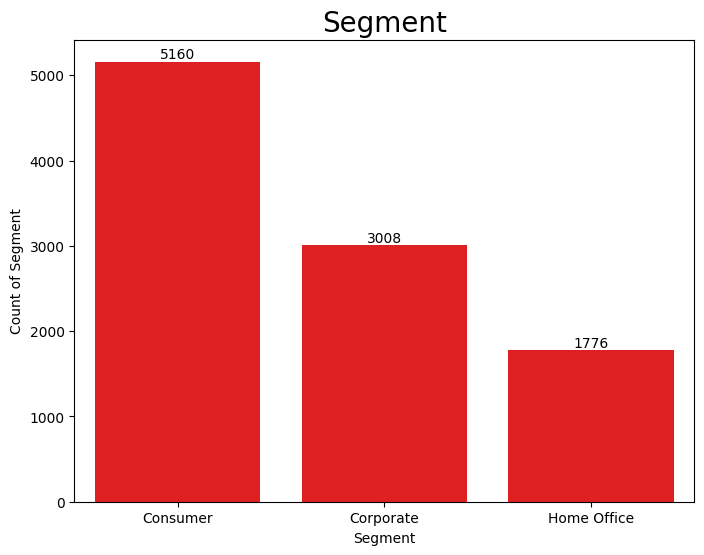

In [62]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x = "Segment", data = df, color ="red")
for bars in ax.containers:
    ax.bar_label(bars)
plt.ylabel("Count of Segment")
plt.title("Segment", fontsize =20)
plt.show()

NOTE: Major business distribution in Consumer Segment and Least business distribution in Home Office Segment

In [64]:
gb_seg = df.groupby (["Segment"])[["Sales", "Profit"]].sum()
gb_seg

,Sales,Profit
Segment,,
Consumer,1.159418e+06,133939.5218
Corporate,7.059702e+05,91911.1606
Home Office,4.292117e+05,60246.8755


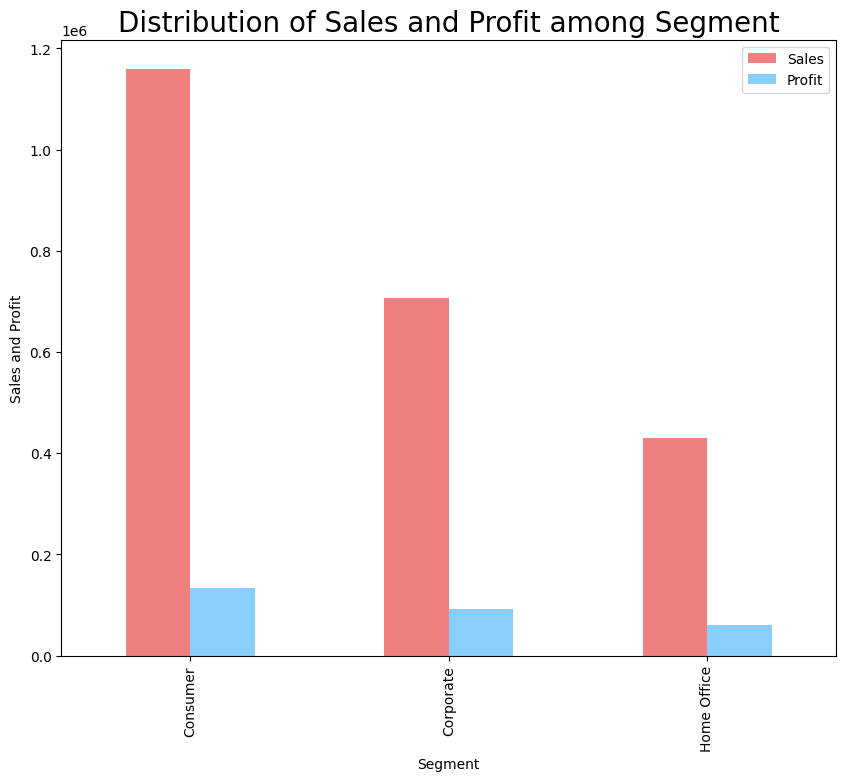

In [66]:
gb_seg.plot(kind = "bar", figsize =(10,8), color = ['lightcoral', 'lightskyblue'])
plt.xlabel('Segment')
plt.ylabel('Sales and Profit')
plt.title('Distribution of Sales and Profit among Segment', fontsize = 20)
plt.show()

NOTE: Maximum Sales and Profit in Consumer Segment and minimum Sales and Profit in Home Office Segment

# Pairplot among Sales, Quantity, Discount and Profit

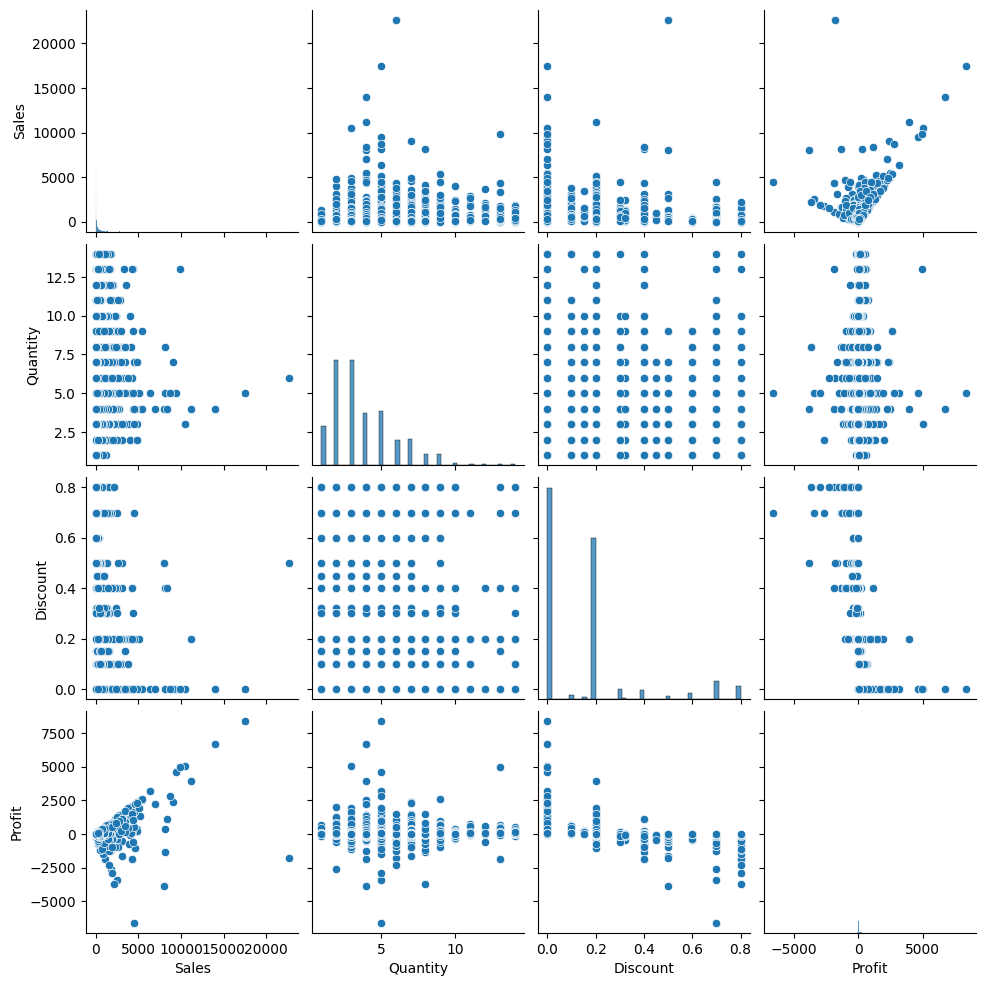

In [77]:
sns.pairplot(df)
plt.show()

NOTE: As Discount increases Profit decreases, As Discount decreases Sales decreases, As Sales increase Profit increases

In [73]:
df['Discount'].corr(df['Profit'])

-0.21993898249765045

# Lineplot between Discount and Profit

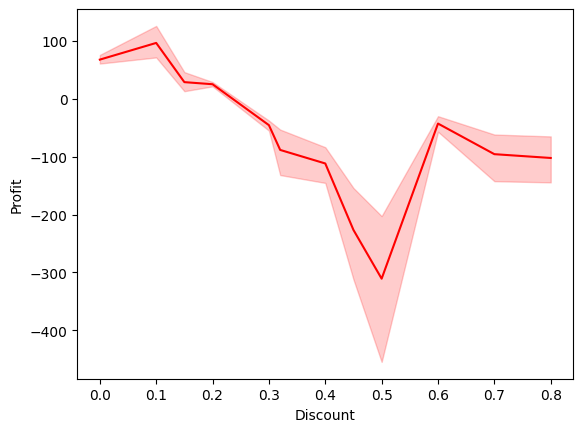

In [74]:
sns.lineplot(x = "Discount", y = "Profit", data =df, color ='red')
plt.show()

NOTE: The above line chart shows that there is negative relation between Discount and Profit i.e. when one increases the other decreases

# CONCLUSION:

From the above analysis we can concluded that:

1-  The major distribution of products is Binders and Paper which belong to Office Supplies and the minor distribution of products is Copiers and
    machines which belong to Technology category.

2-  The maximum Sales and Profit is Phones which belong to Technology category and the minimum Sales and Profit is Fasteners which belong to Office
    Supplies.

3-  The maximum distribution of Sales and Profit in Califonia and New York and having most number of buyers in these states and the minimum
    distribution of Sales and Profit in Texas,Ohio and Pennsylvania but least number of buyers in Wyoming, West Virginia and North Dakota.

4-  The maximum Sales and Profit in West region and having most number of buyers and the minimum Sales in South region and having least number of
    buyers and minimum Profit in Central region.

5-  The most opted Ship Mode is Standard Class in West region and the least opted Ship Mode is Same Day in South region.

6-  The maximum Sales and Profit in Consumer Segment which is having maximum business distribution and the minimum Sales and Profit in Home Office
    Segment which is having minimum business distribution.

7-  There is negative relation between Discount and Profit so that the discount decreases then Profit increases and viceversa.      
    
    

# RECOMMENDATION

1-  The quality and distribution of products such as copiers and machines belong to technology category should be increased for improving the 
    productivity of sales.

2-  The most number of buyers belong to California and New York so as per the buyers requirement we should increased the distribution of products 
    in these states.

3-  The distribution of products in Home Office Segment should be increased so that they get maximum Sales and Profit.
    